# Homework 1 - Your Name - PHYS 403, SPR 2022

Example of how to entirely answer write up answers to homework using a Jupyter notebook.

## Problem 1

What is the probability that in a class of 10 people, at least two share a birthday?

### Solution

We want $P(A)$, where $A$ is the premise that two or more people share a birthday.

It's easier to start with $P(\bar{A})$, where $\bar{A}$ is the premise that no two people share a birthday. Then we use the sum rule of probability to compute $P(A)$:

$$
P(A) = 1 - P(\bar{A})
$$

To compute $P(\bar{A})$, take the product of the following conditional probabilities:
1. $P(1|1) = 365/365=1$, the probability of birthday 1 not being shared is 1.
1. $P(2|1) = 364/365$, the probability of birthday 2 not being shared given the birthday of person 1.
2. $P(3|1,2) = 363/365$, the probability of birthday 3 not being shared given birthdays 1 and 2.
3. $P(4|1,2,3) = 362/365$, the probability of birthday 4 not being shared given birthdays 1, 2, and 3.

...

9. $P(10|1,2,3,\ldots,9) = 356/365$, the probability of birthday 10 not being shared given birthdays 1 through 9.

Therefore,
$$
\begin{align*}
P(\bar{A}) &= \frac{365}{365}\cdot\frac{364}{365}\cdot\frac{363}{365}\cdot\ldots\cdot\frac{356}{365} \\
&= \frac{365!}{355!\cdot365^{10}} \\
&\approx 0.893
\end{align*}
$$
and
$$
P(A) = 1 - P(\bar{A}) \approx 0.117 = 11.7\%.
$$

The pattern for $n$ people appears to be
$$
P(A|n) = \frac{365!}{(365-n)!\cdot 365^n}.
$$

## Problem 2

Write a function that computes the probability that at least 2 out of $n$ people share a birthday, for arbitrary $n$. Check your answer by computing $P(A|n=10)$.

### Solution

In [1]:
def bdayprob(n):
    """Compute probability of at least 2 of n people sharing a birthday.
    
    Parameters
    ----------
    n : int
        Number of people.
    
    Returns
    -------
    prob : float
        Probability of 2 of n people sharing a birthday.
    """
    # We could compute 365! / ((365-n)! * 365^n), but each term is a large number
    # that could lead to numerical overflow. Instead, accumulate the probability
    # that no two people share a birthday with a simple loop.
    pnot = 1.
    m = n - 1
    while m >= 0:
        pnot *= (365 - m) / 365
        m -= 1
    return 1 - pnot

In [2]:
# Example: n = 10
bdayprob(10)

0.11694817771107768

## Problem 3

Plot the probability $P(n)$ as a function of $n$ for $n\in[1,80]$.

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# Increase the font size in plots.
mpl.rc('font', size=14)

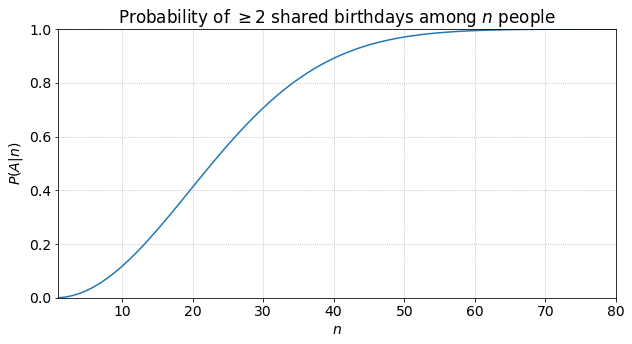

In [6]:
# Compute the data.

n = np.arange(1,81,1)             # n  = [1,2,3,...,80]
pr = [bdayprob(_n) for _n in n]   # pr = [p(1), p(2), p(3), ...]

# Plot the results. Note how we clearly define the axis labels, titles, ranges, etc.

fig, ax = plt.subplots(1,1, figsize=(9,5), tight_layout=True)
ax.plot(n, pr)
ax.set(title='Probability of $\geq2$ shared birthdays among $n$ people',
       xlabel='$n$', ylabel='$P(A|n)$',
       xlim=[1,80], ylim=[0,1])
ax.grid(ls=':');